We can list the installed library by **!pip list**

In [6]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       1.2.0
aiohttp                       3.8.3
aiosignal                     1.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
async-timeout                 4.0.2
asynctest                     0.13.0
attrs                         22.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
Bottleneck                    1.3.5
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.2.0
casadi                        3.5.5
certifi                       2022.9.24
cffi                          1.15.1
charset-normalizer            2.1.1
cloudpickle                   2.2.0
colorama                      0.4.5
colorspacious                 1.1.2
cryptography                  37.0.1
cupy-c

Most of the required library has installed in colab.

# Pytorch can be used as a general optimizer!

**Pytorch is a framework for general gradient optimization. Pytorch is widely used in solving the optimization problem of training a deep neural networks.**

**We can use Pytorch to find the minium or maximum of arbitrarily complex optimization objectives.**

# **Example**

**Here is an example of solving a basic regression problem.**

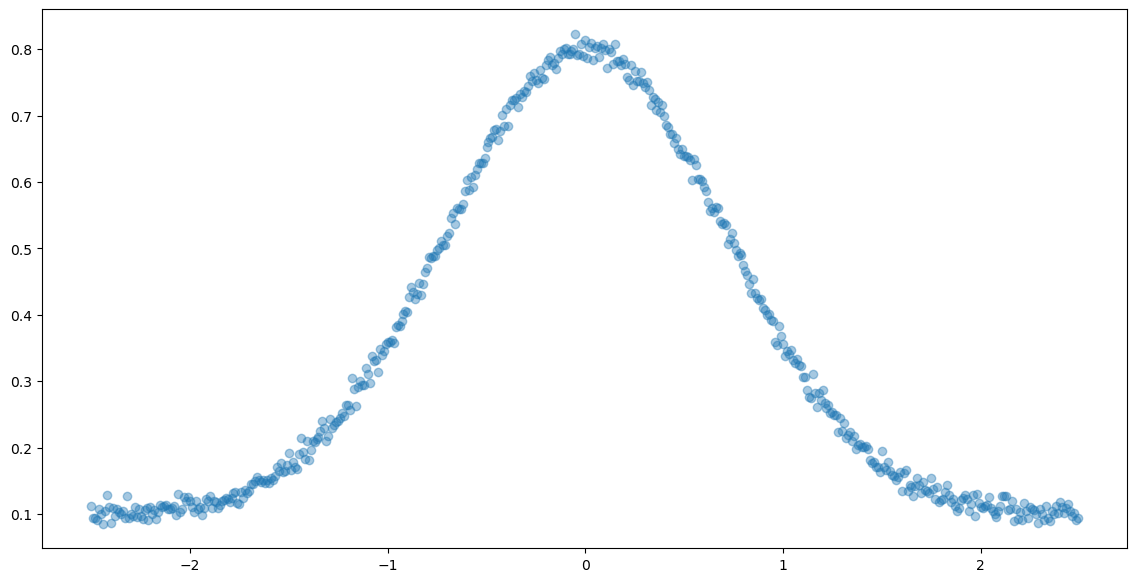

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.functional import F
from copy import copy
import seaborn as sns


# Sample the data from a predefined gaussian function with gaussian noise
n = 500
noise = torch.Tensor(np.random.normal(0, 0.01, size=n))
x = torch.arange(-2.5,2.5,0.01)
a, mu, bias = 0.7, 0, 0.1
y = a * np.exp(-(x-mu)**2) + bias + noise
plt.figure(figsize=(14, 7))
plt.scatter(x, y, alpha=0.4)


# **Define the regression module**

In [8]:
# Define a regression module with 3 parameters

class Regression_Model(nn.Module):

  def __init__(self):
    super().__init__()

    # initialize weights with random numbers
    weights = torch.distributions.Uniform(0, 0.1).sample((3,))

    # By calling nn.Parameter, the weight we defined here will behave in the same way as standard Pytorch parameters.
    # They can calculate the gradients automatically and then be updated in response to a loss function.
    self.weights = nn.Parameter(weights,requires_grad=True)        
      
  def forward(self, X):
    """Implement function to be optimised. In this case, a gaussian
    function (var * exp(-(X-mu)^2) + bias),
    """
    a, mu, bias = self.weights
    return a * torch.exp(-(X-mu)**2) + bias 


# define the training loop
def training_loop(model, optimizer, n=1000):
  losses = []
  for i in range(n):
    preds = model(x)
    loss = F.mse_loss(preds, y).sqrt()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.detach().numpy())  
  return losses

# **Estimate the parameters of the regression model**

Parameter containing:
tensor([0.7017, 0.0018, 0.0995], requires_grad=True)


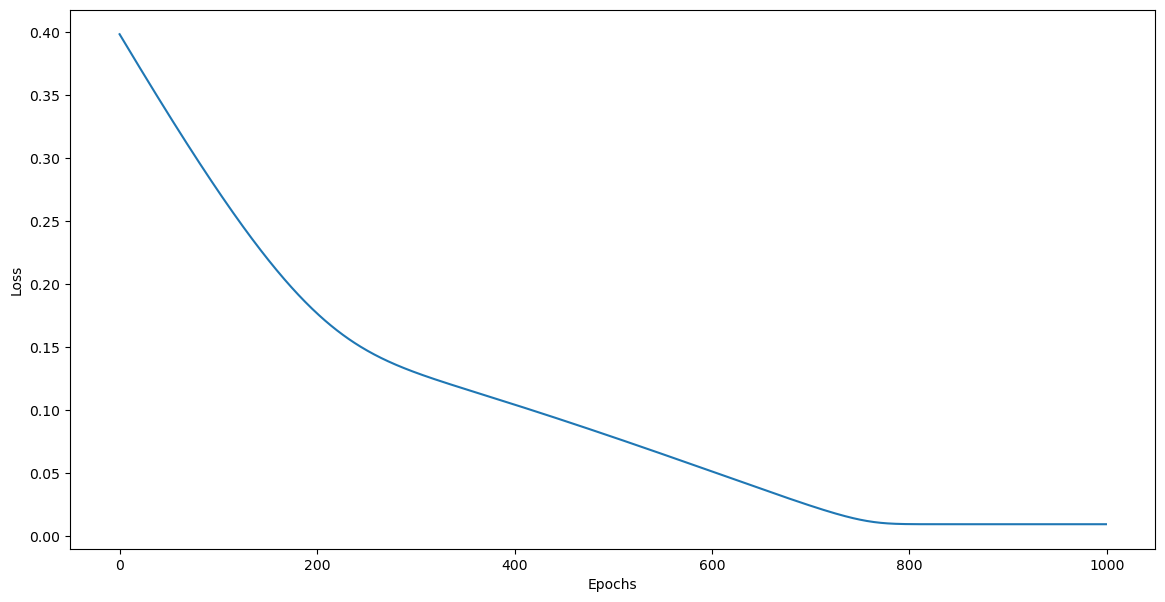

In [9]:
# instantiate model
model = Regression_Model()

# Instantiate optimizer
opt = torch.optim.Adam(model.parameters(), lr=0.001)

# return the training loss
losses = training_loop(model, opt)

plt.figure(figsize=(14, 7))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
print(model.weights)

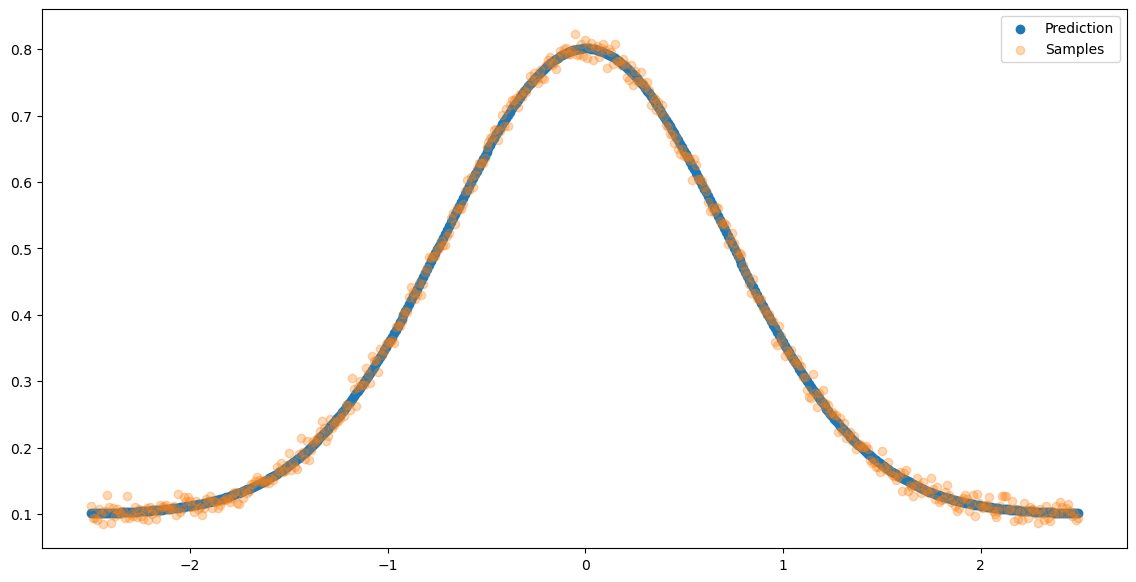

In [10]:
preds = model(x)
plt.figure(figsize=(14, 7))
plt.scatter(x, preds.detach().numpy())
plt.scatter(x, y, alpha=.3)
plt.legend(['Prediction','Samples'])